In [1]:
import os
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

/Users/timchristy/.local/share/virtualenvs/agriculture-price-analysis-wczIgwxP/lib/python3.8/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/timchristy/.local/share/virtualenvs/agriculture-price-analysis-wczIgwxP/lib/python3.8/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
os.getcwd()

'/Users/timchristy/Desktop/agriculture-price-analysis/notebooks/01_exploration'

In [3]:
path_to_data = '../../../agriculture_prices.db'

In [4]:
conn = sqlite3.connect(path_to_data)
c = conn.cursor()

In [5]:
produce_df = pd.DataFrame(c.execute('''SELECT * FROM agriculture_prices''').fetchall())

In [6]:
produce_df.columns = ['Farm Price', 'Atlanta Retail', 'Chicago Retail', 'Los Angeles Retail', 'NYC Retail', 'Avg Spread', 'Commodity', 'Date']

In [7]:
produce_df.head()

,Farm Price,Atlanta Retail,Chicago Retail,Los Angeles Retail,NYC Retail,Avg Spread,Commodity,Date
0,1.16,2.23,1.70,1.99,2.54,82.33%,Strawberries,2019-05-19
1,0.91,2.67,1.89,2.47,2.66,166.21%,Strawberries,2019-05-12
2,0.58,2.42,1.89,2.12,2.91,302.59%,Strawberries,2019-05-05
3,0.58,2.79,1.95,2.38,2.96,334.48%,Strawberries,2019-04-28
4,0.69,2.92,2.04,2.38,3.16,280.43%,Strawberries,2019-04-21


In [8]:
produce_df.tail()

,Farm Price,Atlanta Retail,Chicago Retail,Los Angeles Retail,NYC Retail,Avg Spread,Commodity,Date
213791,0.28,1.69,0.0,1.24,1.19,267.86%,Nectarines,2000-07-23
213792,0.26,1.61,0.0,1.37,1.19,300.96%,Nectarines,2000-07-16
213793,0.30,1.71,0.0,1.42,1.19,260.00%,Nectarines,2000-07-09
213794,0.33,1.96,0.0,0.92,1.04,196.97%,Nectarines,2000-07-02
213795,0.39,1.22,0.0,0.92,1.19,113.46%,Nectarines,2000-06-25


In [9]:
produce_df.index = pd.to_datetime(produce_df['Date'])

In [10]:
conn.close()

# Exploration of Prices over time. 
Will be analyzing the average price per year for each produce and maybe by month later on...

In [11]:
produce_df['Commodity'].unique()

array(['Strawberries', 'Romaine Lettuce', 'Red Leaf Lettuce', 'Potatoes',
       'Oranges', 'Iceberg Lettuce', 'Green Leaf Lettuce', 'Celery',
       'Cauliflower', 'Carrots', 'Cantaloupe', 'Broccoli Crowns',
       'Avocados', 'Broccoli Bunches', 'Asparagus', 'Flame Grapes',
       'Thompson Grapes', 'Honeydews', 'Tomatoes', 'Plums', 'Peaches',
       'Nectarines'], dtype=object)

In [12]:
produce_dict = {}

In [13]:

for produce in list(produce_df['Commodity'].unique()):
    produce_dict[produce] = produce_df[produce_df['Commodity'] == produce]


In [14]:
produce_dict['Oranges']

,Farm Price,Atlanta Retail,Chicago Retail,Los Angeles Retail,NYC Retail,Avg Spread,Commodity,Date
Date,,,,,,,,
2019-05-19,1.16,2.23,1.70,1.99,2.54,82.33%,Oranges,2019-05-19
2019-05-12,0.91,2.67,1.89,2.47,2.66,166.21%,Oranges,2019-05-12
2019-05-05,0.58,2.42,1.89,2.12,2.91,302.59%,Oranges,2019-05-05
2019-04-28,0.58,2.79,1.95,2.38,2.96,334.48%,Oranges,2019-04-28
2019-04-21,0.69,2.92,2.04,2.38,3.16,280.43%,Oranges,2019-04-21
...,...,...,...,...,...,...,...,...
2000-02-13,0.06,0.36,0.00,0.57,0.30,412.50%,Oranges,2000-02-13
2000-02-06,0.07,0.36,0.00,0.57,0.26,325.00%,Oranges,2000-02-06
2000-01-30,0.06,0.36,0.00,0.51,0.41,433.33%,Oranges,2000-01-30


In [18]:
produce_yearly_mean_dict = {}
produce_yearly_std_dict = {}

In [19]:
for key, value in produce_dict.items():
    produce_yearly_mean_dict[key] = produce_dict[key].resample('Y').mean()
    produce_yearly_std_dict[key] = produce_dict[key].resample('Y').std()

,Farm Price,Atlanta Retail,Chicago Retail,Los Angeles Retail,NYC Retail
Date,,,,,
1999-12-31,0.263923,0.366254,0.000000,0.670550,0.369883
2000-12-31,0.452741,0.515771,0.000000,0.752790,0.486153
2001-12-31,0.480457,0.652995,0.955515,0.795472,0.436647
2002-12-31,0.511389,0.401691,0.714395,0.858224,0.504892
2003-12-31,0.704554,0.857216,0.793502,0.829427,0.839789
2004-12-31,0.778024,0.852264,0.804274,1.080368,0.941289
2005-12-31,0.616277,0.670895,0.851686,0.901529,0.816410
2006-12-31,0.529368,0.600194,0.826670,0.833046,0.803809
2007-12-31,0.646597,0.527704,0.622684,0.938381,0.829790


In [ ]:
def annual_mean_plot(title, xlabel, ylabel, produce):
    plt.figure(figsize=(12, 8))
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=15)
    plt.xticks(fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.yticks(fontsize=15)
    plt.plot(produce_yearly_mean_dict[produce].index, produce_yearly_mean_dict[produce])
    plt.legend(produce_yearly_mean_dict[produce].columns, loc='lower right', fontsize=15)

# Problems with this graph

1. Inflation needs to be taken into account
2. It would be better to average a retail price rather than observe all of that


# Inflation
Need to adjust for inflation. The following data was gathered from [The Federal Reserve Bank of Minneapolis](https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1913-)


| Year |  CPI  | Annual % Change|
|------|-------|------|
| 1997 | 160.5 | 2.3% |
| 1998 | 163.0 | 1.6% |
| 1999 | 166.6 | 2.2% |
| 2000 | 172.2 | 3.4% |
| 2001 | 177.1 | 2.8% |
| 2002 | 179.9 | 1.6% |
| 2003 | 184.0 | 2.3% |
| 2004 | 188.9 | 2.7% |
| 2005 | 195.3 | 3.4% |
| 2006 | 201.6 | 3.2% |
| 2007 | 207.3 | 2.9% |
| 2008 | 215.3 | 3.8% |
| 2009 | 214.5 | -0.4%|
| 2010 | 218.1 | 1.6% |
| 2011 | 224.9 | 3.2% |
| 2012 | 229.6 | 2.1% |
| 2013 | 233.0 | 1.5% |
| 2014 | 236.7 | 1.6% |
| 2015 | 237.0 | 0.1% |
| 2016 | 240.0 | 1.3% |
| 2017 | 245.1 | 2.1% |
| 2018 | 251.1 | 2.4% |
| 2019*| 255.5 | 1.8% |

* 2019: It is still December 2019 as I write this. The average through November was calculated using the data from this website : [https://inflationdata.com/Inflation/Consumer_Price_Index/CurrentCPI.asp?reloaded=true](https://inflationdata.com/Inflation/Consumer_Price_Index/CurrentCPI.asp?reloaded=true) . 

This will be used to adjust prices to 2019 dollars

In [21]:
produce_list = list(produce_dict.keys())

In [22]:
for item in produce_list:
    produce_yearly_mean_dict[item].index = produce_yearly_mean_dict[item].index.year

# Adding in the CPI column to all dataframes

In [26]:
cpi = [166.6, 172.2, 177.1, 179.9, 184.0, 188.9, 195.3, 201.6, 207.3, 215.3, 214.5, 218.1, 224.9, 229.6, 233.0, 236.7, 237.0, 240.0, 245.1, 251.1, 255.5]

In [27]:
for item in produce_list:
    produce_yearly_mean_dict[item]['CPI'] = cpi

In [33]:
produce_yearly_mean_dict['Oranges'].head()

,Farm Price,Atlanta Retail,Chicago Retail,Los Angeles Retail,NYC Retail,CPI
Date,,,,,,
1999,0.867907,3.165581,0.000000,2.507674,3.012558,166.6
2000,0.543660,2.108969,0.000000,1.735722,2.094845,172.2
2001,0.577964,1.989005,1.917919,1.743982,2.007828,177.1
2002,0.652154,1.941626,2.007724,1.678089,2.137805,179.9
2003,0.569522,1.994303,1.977052,1.729681,2.178924,184.0


In [34]:
produce_yearly_mean_dict['Romaine Lettuce'].tail()

,Farm Price,Atlanta Retail,Chicago Retail,Los Angeles Retail,NYC Retail,CPI
Date,,,,,,
2015,1.157745,2.308431,2.278824,2.446961,2.931569,237.0
2016,1.000481,2.283654,2.329038,2.268077,2.745962,240.0
2017,1.000952,2.233619,2.326667,2.218381,2.629524,245.1
2018,0.984900,2.264500,2.427600,2.232600,2.735510,251.1
2019,1.026154,2.451795,2.452051,2.306667,2.813684,255.5


# Converting to 2019 dollars
Formula is 
$$ \mathrm{2019\ Dollars} = \mathrm{Then\ Dollars} * \frac{\mathrm{2019\ CPI}}{\mathrm{Then\ CPI}}$$

Where the 2019 CPI is 255.5, which is what that number is below.

In [45]:
for item in produce_list:
    farm_price_adj = [((x[0]/x[-1])* 255.5) for x in produce_yearly_mean_dict[item].values]
    avg_retail = [((np.mean(x[1:5])/x[-2])*255.5) for x in produce_yearly_mean_dict[item].values]
    produce_yearly_mean_dict[item]['2019 Adj. Farm Price'] = farm_price_adj
    produce_yearly_mean_dict[item]['Avg Retail (2019 Adj)'] = avg_retail
    #produce_yearly_mean_dict[item].drop(columns=['Atlanta Retail', 'Chicago Retail', 'Los Angeles Retail', 'NYC Retail', 'Farm Price', 'CPI'], inplace=True)
    produce_yearly_mean_dict[item][]

In [46]:
produce_yearly_mean_dict['Strawberries']

,2019 Adj. Farm Price,Avg Retail (2019 Adj)
Date,,
1999,166.6,3.324491
2000,172.2,2.897508
2001,177.1,4.161362
2002,179.9,4.164412
2003,184.0,4.311494
2004,188.9,4.376165
2005,195.3,3.944547
2006,201.6,3.895519
2007,207.3,3.976277


In [100]:
strawberry_yearly_mean_df.drop(columns=['Atlanta Retail', 'Chicago Retail', 'Los Angeles Retail', 'NYC Retail', 'Farm Price', 'CPI'], inplace=True)

In [101]:
strawberry_yearly_mean_df.head()

,2019 Adj. Farm Price,Avg Retail (2019 Adj)
Date,,
1999,1.229191,3.324491
2000,1.505322,2.897508
2001,1.893440,4.161362
2002,1.768529,4.164412
2003,1.977239,4.311494


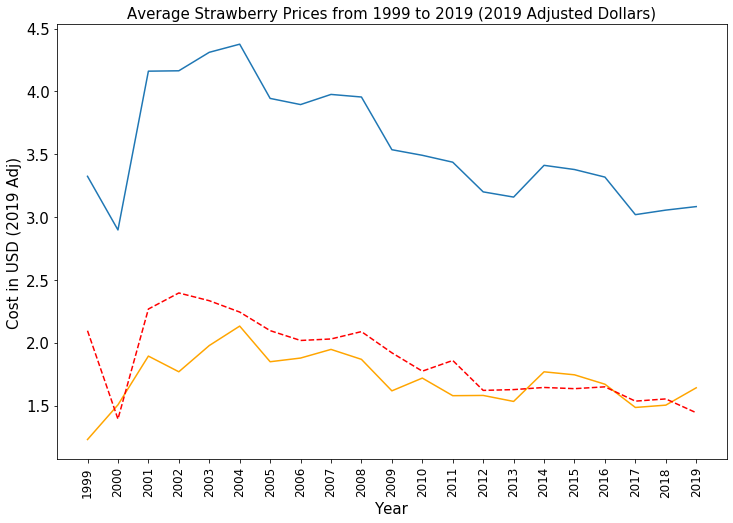

In [109]:
plt.figure(figsize=(12,8))
plt.plot(strawberry_yearly_mean_df.index, strawberry_yearly_mean_df['2019 Adj. Farm Price'], c='orange');
plt.plot(strawberry_yearly_mean_df.index, strawberry_yearly_mean_df['Avg Retail (2019 Adj)'])
plt.plot(strawberry_yearly_mean_df.index, (strawberry_yearly_mean_df['Avg Retail (2019 Adj)'] - strawberry_yearly_mean_df['2019 Adj. Farm Price']), c='red', linestyle='--')
plt.title('Average Strawberry Prices from 1999 to 2019 (2019 Adjusted Dollars)', fontsize = 15);
plt.xticks([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], fontsize=12, rotation=90)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Cost in USD (2019 Adj)', fontsize=15);


In [104]:
produce_df['Commodity'].unique()

array(['Strawberries', 'Romaine Lettuce', 'Red Leaf Lettuce', 'Potatoes',
       'Oranges', 'Iceberg Lettuce', 'Green Leaf Lettuce', 'Celery',
       'Cauliflower', 'Carrots', 'Cantaloupe', 'Broccoli Crowns',
       'Avocados', 'Broccoli Bunches', 'Asparagus', 'Flame Grapes',
       'Thompson Grapes', 'Honeydews', 'Tomatoes', 'Plums', 'Peaches',
       'Nectarines'], dtype=object)